## Regressão

O objetivo deste exercício é introduzir e praticar conceitos de Regressão. Para isso utilizaremos 2 bases: <i>Advertising.csv</i> e <i>Portland_housePrices.csv</i>

In [128]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import time

split = 0.3

def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

def calc_mse(y, predicted):
    return mean_squared_error(predicted, y, squared=False)

In [129]:
import pandas as pd
from sklearn import preprocessing

dados_adv0 = pd.read_csv('data/Advertising.csv', index_col=0)
dados_adv0 = dados_adv0.sample(frac=1)

scaler = preprocessing.MinMaxScaler()
names = dados_adv0.columns
d = scaler.fit_transform(dados_adv0)
dados_adv = pd.DataFrame(d, columns=names)
#dados_adv = preprocessing.normalize(dados_adv0)
dados_adv.head()

,TV,radio,newspaper,sales
0,0.670950,0.616935,0.337731,0.657480
1,0.837673,0.608871,0.175901,0.732283
2,0.054785,0.881048,0.783641,0.279528
3,0.292526,0.237903,0.225154,0.354331
4,0.251606,0.705645,0.460862,0.433071


In [130]:
dados_por0 = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
dados_por0 = dados_por0.sample(frac=1)
scaler = preprocessing.MinMaxScaler()
names2 = dados_por0.columns
d2 = scaler.fit_transform(dados_por0)
dados_por = pd.DataFrame(d2, columns=names2)
#dados_por = preprocessing.normalize(dados_por0)
dados_por.head()

,tamanho,quartos,preco
0,0.272201,0.25,0.339623
1,0.316602,0.50,0.334151
2,0.188086,0.50,0.273585
3,0.206288,0.50,0.301887
4,0.399338,0.75,0.528302


In [131]:
# import pandas as pd

# dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
# dados_adv.head()

<i>Advertising</i> é um conjunto de dados relacionando o montante de vendas (<i>sales</i>) com o montante investido em marketing em diferentes médias (<i>TV</i>,<i>radio</i> e <i>newspaper</i>).

Por sua vez, <i>Portland_housePrices</i> relaciona o preço de casas com seu tamanho e número de quartos.



In [132]:
# dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
# dados_por.head()

## Como treinar e usar modelos?
Para virtualmente qualquer tipo de algoritmo de Regressão, existirá uma função <i>fit</i> para treinar o modelo.

Por exemplo, para a regressão linear:

```python
 reg = LinearRegression().fit(X,y)
``` 

Onde <i> X </i> se refere aos atributos de treinamento e <i>y</i> à variável resposta.


In [133]:
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

div1 = int(split * len(X))
xtrain = X[:div1]
xtest = X[div1:]

div2 = int(split * len(y))
ytrain = y[:div2]
ytest = y[div2:]

reg = LinearRegression().fit(X,y)
reg

LinearRegression()

Após treinado, o modelo pode ser utilizado para fazer predições (prever <i>y</i> para novos exemplos), através da função <i>predict</i>

In [134]:
y_hat = reg.predict(X[0:4])
y_hat

array([[0.28068396],
       [0.32154918],
       [0.20326846],
       [0.22002067]])

# Regressão Linear Multivariada
A classe <i>LinearRegression</i> já está implementada de modo a funcionar com múltiplos atributos preditores.

Também é possível utilizar o método de <i>Descida de Gradiente</i> através da classe <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html'>SGDRegressor</a>:
    


In [135]:
from sklearn.linear_model import SGDRegressor
reg_grad = SGDRegressor(max_iter=5000,alpha=0) #alpha = 0 significa que o modelo nao usa regularização (a ser explicado nas próximas aulas)
reg_grad.fit(X,y.values.ravel())

SGDRegressor(alpha=0, max_iter=5000)

Text(0, 0.5, 'Preço')

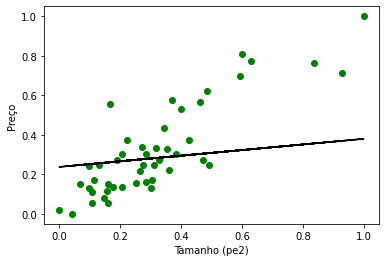

In [136]:
from matplotlib import pyplot as plt
plt.scatter(X, y,color='g')
plt.plot(X, reg_grad.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

In [137]:
rss = calc_rss(y,reg.predict(X))
r2 = calc_r2(y,reg_grad.predict(X))
mse = calc_mse(y,reg_grad.predict(X))
print(rss)
print(r2)
print(mse)

0.6887307853353719
-46.14679539632522
0.2113185710136868


<b>Entretanto</b>... o algoritmo não aprende quando os dados são usados diretamente.

<b>Por quê?</b>

A escala dos dados atrapalha o algoritmo. Tente treinar o regressor linear com descida do gradiente <i>depois de normalizar os dados de entrada</i>.

## Exercício 1

Para cada um dos conjuntos de treinamento, utilize a função <i>fit</i> múltiplas vezes considerando apenas <i>um</i> atributo preditor.

1) O modelo aprendido muda a cada vez que a função <i>fit</i> é utilizada?

2) Os modelos finais aprendidos são os mesmos da outra implementação de regressão linear?


In [138]:
div1 = int(split * len(X))
xtrain = X[:div1]
xtest = X[div1:]

div2 = int(split * len(y))
ytrain = y[:div2]
ytest = y[div2:]

In [139]:
# Múltiplos fit na regressão linear
reg2 = LinearRegression().fit(xtrain,ytrain)
reg2 = LinearRegression().fit(xtrain,ytrain)
reg2 = LinearRegression().fit(xtrain,ytrain)
reg2 = LinearRegression().fit(xtrain,ytrain)
reg2 = LinearRegression().fit(xtrain,ytrain)
y_hat = reg2.predict(xtest[0:4])
y_hat

array([[0.6018871 ],
       [0.09905561],
       [0.43970469],
       [0.49185832]])

In [140]:
rss2 = calc_rss(ytest,reg2.predict(xtest))
r22 = calc_r2(ytest,reg2.predict(xtest))
mse2 = calc_mse(ytest,reg2.predict(xtest))
print(rss2)
print(r22)
print(mse2)

0.5460830534029195
0.5165903694602783
0.12863891835381697


In [141]:
# Múltiplos fit no gradiente descendente
reg_grad.fit(xtrain,ytrain.values.ravel())
reg_grad.fit(xtrain,ytrain.values.ravel())
reg_grad.fit(xtrain,ytrain.values.ravel())
reg_grad.fit(xtrain,ytrain.values.ravel())
reg_grad.fit(xtrain,ytrain.values.ravel())

rss2 = calc_rss(ytest,reg.predict(xtest))
r22 = calc_r2(ytest,reg_grad.predict(xtest))
mse2 = calc_mse(ytest,reg_grad.predict(xtest))

print(rss2)
print(r22)
print(mse2)

0.4509868885611623
-147.82527238159275
0.24454013983035675


Text(0, 0.5, 'Preço')

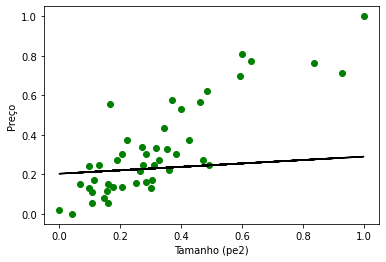

In [142]:
plt.scatter(X, y,color='g')
plt.plot(X, reg_grad.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

Text(0, 0.5, 'Preço')

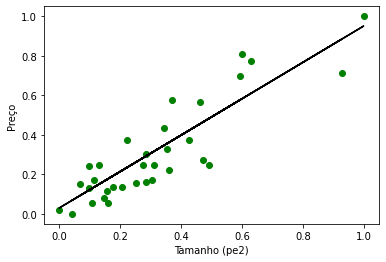

In [143]:
plt.scatter(xtest, ytest,color='g')
plt.plot(xtest, reg.predict(xtest),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

## Exercício 2


Aprenda modelos utilizando todos os atributos de entrada.

1) Baseado no RSS e no R^2, é possível obter um modelo melhor utilizando todos os dados?

2) Existem atributos que poderiam ser desconsiderados sem que fosse afetada a precisão?

3) Qual implementação treina mais rápido? A com método dos mínimos quadrados ou a com descida de gradiente?


In [144]:
xt = dados_por.loc[:,['tamanho', 'quartos']]
yt = dados_por.loc[:,['preco']]

div1 = int(split * len(xt))
xtraint = xt[:div1]
xtestt = xt[div1:]

div2 = int(split * len(yt))
ytraint = yt[:div2]
ytestt = yt[div2:]

In [154]:
start = time.time()
regt = LinearRegression().fit(xtraint,ytraint)
end = time.time()
print("Tempo to execucao:", end-start)
y_hatt = regt.predict(xtraint[0:4])

Tempo to execucao: 0.0031075477600097656


In [150]:
rsst = calc_rss(ytestt,regt.predict(xtestt))
r2t = calc_r2(ytestt,regt.predict(xtestt))
mset = calc_mse(ytestt,regt.predict(xtestt))

# Tamanho
print("Tamanho:")
print(rsst)
print(r2t)
print(mset)
print("\n")

# Tamanho, Quartos
print("Tamanho, Quartos:")
print(rsst)
print(r2t)
print(mset)

Tamanho:
0.5942497030738216
0.39602841114139586
0.13419227533585076


Tamanho, Quartos:
0.5942497030738216
0.39602841114139586
0.13419227533585076


In [155]:
reg_grad2 = SGDRegressor()

start2 = time.time()
reg_grad2.fit(xtrain,ytrain.values.ravel())
end2 = time.time()
print("Tempo to execucao:", end2-start2)

Tempo to execucao: 0.0018737316131591797


# Exercício 3

Realizar a análise da qualidade dos preditores utilizados no modelo construído.

1) Construir o plot de resíduos. Será que os resíduos estão aleatoriamente distribuídos ao redor de 0?

2) Calcular os valores p para os preditores utilizados no modelo de regressão. Utilize [esse link](https://stackoverflow.com/a/42677750) como referência. Utilizar essa técnica para selecionar variáveis preditivas. Comparar o desempenho do modelo construído a partir de variáveis preditivas com melhores valores p com um modelo que contêm todas as variáveis.

https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression/42677750#42677750


In [156]:
from scipy import stats
import numpy as np
xtrain = np.random.random(10)
ytrain = np.random.random(10)
# r_value = stats.linregress(xtrain,ytrain)
slope, intercept, r_value, p_value, std_err = stats.linregress(xtrain,ytrain)
print("r-squared train:", r_value**2, p_value)

xtraint = np.random.random(10)
ytraint = np.random.random(10)

slope, intercept, r_value, p_value, std_err = stats.linregress(xtraint,ytraint)
print("r-squared train:", r_value**2, p_value)

#r_value, p_value = stats.linregress(X,y)
#print("r-squared tudo:", r_value**2)

r-squared train: 0.002388075056969783 0.8933563088319578
r-squared train: 0.037507478167834174 0.5918858427531162


# Exercício 4

Realizar o teste para descobrir multicolinearidade entre variáveis preditivas;

1) Utilizando [esse link](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/) fazer o cáclulo do fator de inflação da variância (*Variance Inflation Factor - VIF*). Existe alguma evidência de multicolinearidade entre as variáveis preditivas?